In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

red= '#ac0e28'
blue= '#010a1c'

In [3]:
date= '2023-05-08'
path= Path(f'output/member_data_{date}.parquet')
df= pd.read_parquet(path)

# Filter DF

In [27]:
# add flag for club member
# find active member in the last 6 months
df_segmented= (df
    .assign(
        is_club= np.where(
            (df['addon_1'].str.lower().str.contains('club', na= False)) | (df['addon_2'].str.lower().str.contains('club', na= False)), 
            'Club', 'Non-Club' 
        )
    )
    .loc[lambda df_: 
        df_.filter(regex= ('active_')).sum(axis= 1) > 0      
    ]
)

# Helper Function

# Viz

## Age

[]

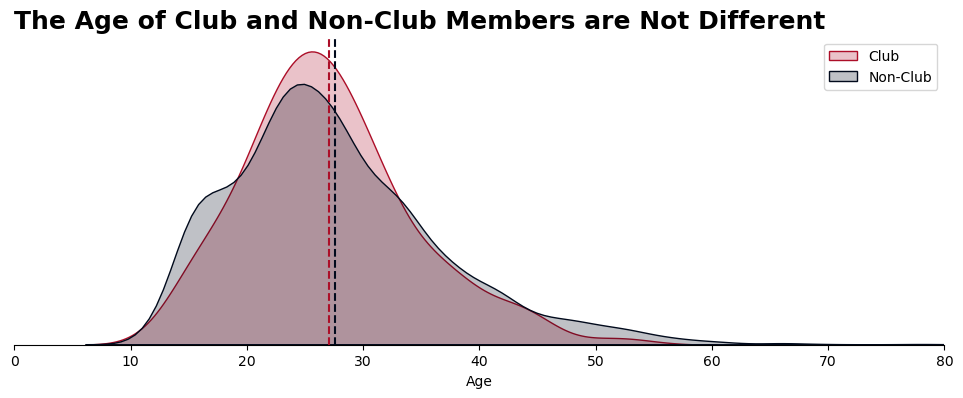

In [89]:
data= df_segmented.loc[df_segmented['age'] > 10]
data_club= data.loc[data['is_club'] == 'Club']
data_nonclub= data.loc[data['is_club'] == 'Non-Club']

mean_club= data_club['age'].mean()
mean_nonclub= data_nonclub['age'].mean()

plt.figure(figsize= (12, 4))

ax= sns.kdeplot(
    data= data_club,
    x= 'age',
    label= 'Club', 
    color= red,
    fill= True, 
)
ax= sns.kdeplot(
    data= data_nonclub,
    x= 'age',
    label= 'Non-Club',
    color= blue,
    fill= True, 
)
plt.axvline(mean_club, color= red, linestyle= '--')
plt.axvline(mean_nonclub, color= blue, linestyle= '--')

ax.legend()

ax.spines[['left', 'right', 'top']].set_visible(False)
ax.tick_params(left=False)
ax.tick_params(labelleft=False)
ax.set_ylabel('')

ax.set_xlabel('Age')
ax.set_xlim(0, 80)

ax.set_title('The Age of Club and Non-Club Members are Not Different', loc= 'left', fontsize= 18, fontweight= 'bold')

plt.plot()

In [90]:
df_segmented

,addon_1,addon_2,age,center,city,contract_duration,core_product,dob,email,end_date,...,product,start_date,active_oct_2022,active_nov_2022,active_dec_2022,active_jan_2023,active_feb_2023,active_mar_2023,active_apr_2023,is_club
5300,None,None,30.0,LW,Jakarta Timur,15,Deluxe,1990-09-10,andichintyaseptiani@gmail.com,2023-01-10,...,[CLB.DLX.15] 15 Months Membership DLX - LW,2021-08-11,True,True,True,True,False,False,False,Non-Club
2504,None,None,36.0,KK,Kab. Gowa,15,Deluxe,1986-05-21,yunisas.manok@gmail.com,2023-11-10,...,[DLX.15] 15 Months Membership Deluxe - 2022 - KK,2022-07-11,True,True,True,True,True,True,True,Non-Club
700,None,None,23.0,NST,Tangerang,15,Deluxe,2000-03-10,Anditenriajenganisa101715@gmail.com,2024-07-12,...,[DLX.15] 15 Months Membership Deluxe - 2023 - NST,2023-04-13,False,False,False,False,False,False,True,Non-Club
4148,None,None,31.0,KK,Jakarta Timur,24,Deluxe,1990-01-11,agatha.devi@rocketmail.com,2023-05-10,...,[CLB.DLX.24] 24 Months Membership DLX - KK,2021-04-11,True,True,True,True,True,True,True,Non-Club
5583,None,None,24.0,LW,"Kota Tangerang, Banten",9,Deluxe,1997-05-05,gochira81@gmail.com,2022-12-05,...,[DLX.9] 9 Months Membership Deluxe - 2022 - GC,2022-03-06,True,True,True,False,False,False,False,Non-Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,None,None,33.0,SDC,"Lueng Bata, Lueng Bata",18,VIP,1989-05-18,zulfikarfull@gmail.com,2024-03-13,...,[VIP.18] 18 Months Membership VIP - 2022 - MKG,2022-09-14,True,True,True,True,True,True,True,Non-Club
2460,None,None,43.0,LW,Jakarta Selatan,12,Go,1979-07-09,zulianti.arsjad@vida.id,2023-11-13,...,[GO.12] 12 Months Membership GO - 2022 - LW,2022-10-14,True,True,True,True,True,True,True,Non-Club
42,Proskill,None,33.0,BSD,"Semper Timur, Cilincing",24,Deluxe,1989-12-04,zulkarnain.muda@gmail.com,2025-06-01,...,[DLX.PRO.24] Bundle Package - 24 Months Member...,2023-04-02,False,False,False,False,False,False,True,Non-Club
2544,None,None,27.0,KK,Bogor,24,Deluxe,1993-11-11,zukkifli.ach@gmail.com,2023-11-08,...,[CLB.DLX.24] 24 Months Membership DLX - DG,2021-10-09,True,True,True,True,True,True,True,Non-Club


## 